# IDENTIFICACIÓN DE SISTEMAS

Profesor: Jairo Alberto Cuéllar Guarnizo  
Programa: Ingeniería en Automatización y Control

In [2]:
from sympy import MatrixSymbol, Matrix, Identity

import sympy as sym
import pandas as pd
sym.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control
import random

# Métodos paramétricos de estimación

## Estimación Lineal por mínimos cuadráticos (LS)

Es una técnica para encontrar un hipotético modelo lineal que se representa como algún vector de parámetros desconocidos $\theta$. Recordar que $y[1], ... , y[N]$ son mediciones de la función que queremos estimar (variables dependientes). 

Existe otra secuencia denominada el matriz de regresión o regresor $\phi[0], ... ,\phi[N]$, las cuales se reconocen como las entradas del modelo de hipótesis o variables independientes, dichos valores dependen del modelo que se asuma como hipótesis.

Un modelo lineal de predicción que incluye errores está dado por la siguiente relación:

$$\hat{y[k]} = \phi[k]^T\theta + \varepsilon[k]$$

Inicialmente consideremos el error como 0, $\hat{y[k]} = \phi[k]^T\theta$. La idea de LS es minimizar el valor de error entre las mediciones $y[k]$ y sus valores estimados $\hat{y[k]}$ elevados al cuadrado, por tanto la función de costo a minimizar sería:

$$\sum_{k=1}^{N}[y[k]-\phi[k]^T\theta]^2$$

Asumamos $y[k]$ como $y$ (datos medidos), $\phi[k]$ como $\phi$. El vector a estimar $\theta$ es el valor que minimiza la función de costo.

Matricialmente la expresión de la función de costo que llamaremos $f(\theta)$ será:

$$f(\theta) = (y - \phi^T\theta)^2$$

Omitiendo los subindices N y la notación vectorial, esta ecuación matricial se puede minimizar y evaluar mediante el cálculo del gradiente.

$$f(\theta) = y^T.y - 2.\phi^T.y.\theta + \phi^T.\phi.\theta^2$$

Calculando el gradiende tendríamos:

$$\bigtriangledown f(\theta) = \bigtriangledown[y^T.y - 2.\phi^T.y.\theta + \phi^T.\phi.\theta^2] = -2.\phi^T.y + 2.\phi^T.\phi.\theta = 0$$

Despejando los parámetros a estimar:

$$\theta = [\phi^T.\phi]^{-1}.\phi^T.y$$

Se define aquí la matriz pseudoinversa de Moore-Penrose así:

$$\phi^+ = [\phi^T.\phi]^{-1}.\phi^T$$

Despejando el estimador:

$$\theta = \phi^+.y$$

## Ejemplo 1 (LS) - Vector de regresión unitario

Asumamos un modelo con las siguientes condiciones:

$$\hat{y[k]} = \phi[k]^T\theta + \varepsilon[k]$$

Si la hipótesis es que $\phi$ es unitario, el modelo a obtener es para un valor constante y se reduce a:

$$\hat{y[k]} = \theta + \varepsilon[k]$$

Ahora se debe encontrar el mejor estimador $\theta$ teniendo en cuenta lo siguiente:

$y = \begin{bmatrix}y[1]\\y[2]\\...\\y[N]\end{bmatrix}$, Según el modelo asumido, el vector de regresión estaría dado por: $\phi = \begin{bmatrix}1\\1\\...\\1\end{bmatrix}$. Las dimensiones de estos vectores es de Nx1.

Es relativamente sencillo calcular el mejor estimador usando la relación obtenida anteriormente:

$$\theta = [\phi^T.\phi]^{-1}.\phi^T.y$$

$$\phi^T.\phi = \begin{bmatrix}1&1&...&1\end{bmatrix}\begin{bmatrix}1\\1\\...\\1\end{bmatrix} = N$$

Y por consiguiente:

$$[\phi^T.\phi]^{-1}=\frac{1}{N}$$

Ahora observemos la expresión:
$$\phi^T.y = \begin{bmatrix}1&1&...&1\end{bmatrix}\begin{bmatrix}y[1]\\y[2]\\...\\y[N]\end{bmatrix} = \sum_{k=1}^{N}y[k]$$

Entonces armando el estimador, se tiene que con un vector de regresión unitario, el modelo estimado es un promedio:

$$\theta = \frac{1}{N}\sum_{k=1}^{N}y[k]$$

## Ejemplo 2 (LS) - Estimación de resistencia por LS

Asumamos un modelo constante con las siguientes condiciones: $y[k] = V[k]$, $\phi[k] = I[k]$, $\theta = R$.

Asumiendo que el mejor estimador es el siguiente:

$$\theta = [\phi^T.\phi]^{-1}.\phi^T.y$$

$$\phi^T.\phi = \begin{bmatrix}I[1]&I[2]&...&I[N]\end{bmatrix}\begin{bmatrix}I[1]\\I[2]\\...\\I[N]\end{bmatrix} = \sum_{k=1}^{N}I[k]^2$$

Por tanto el inverso de esta expresión sería:

$$[\phi^T.\phi]^{-1} = \frac{1}{\sum_{k=1}^{N}I[k]^2}$$

Por último se tiene que 

$$\phi^T.y = \begin{bmatrix}I[1]&I[2]&...&I[N]\end{bmatrix}\begin{bmatrix}V[1]\\V[2]\\...\\V[N]\end{bmatrix} = \sum_{k=1}^{N}I[k]V[k]$$

Finalmente:

$$\theta = \frac{\frac{1}{N}\sum_{k=1}^{N}I[k]V[k]}{\frac{1}{N}\sum_{k=1}^{N}I[k]^2}$$

Modelo previamente estudiado para estimar un valor de resistencias por LS.

## Ejemplo 3 (LS) - Estimación asumiendo como hipótesis un modelo lineal

Asumamos un modelo lineal con las siguientes condiciones: $\hat{y[k]} = \theta_1 + \theta_2.x[k]$. Para ejemplificar un poco se podría tomar un movimiento uniformemente acelerado así: $v_f[k] = v_0+a.t[k]$, entendiendo $y = v_f$, el vector $\phi[k] =[1, t[k]]$ y $\theta = \begin{bmatrix}\theta_1\\\theta_2\end{bmatrix} = \begin{bmatrix}v_0\\a\end{bmatrix}$.

Asumiendo que el mejor estimador es el siguiente:

$$\theta = [\phi^T.\phi]^{-1}.\phi^T.y$$

Y donde el vector del regresor debería tener la siguiente forma, según el modelo esperado:

$$\phi = \begin{bmatrix}1 & t[1]\\1 & t[2]\\...&...\\1 & t[N]\end{bmatrix}$$

Se espera que en este caso el vector de estimación sea:

$$\theta = \begin{bmatrix}\theta_1\\\theta_2\end{bmatrix}$$

Por último se tiene que 

$$\phi^T.\phi = \begin{bmatrix}1&1&...&1\\t[1]&t[2]&...&t[N]\end{bmatrix}\begin{bmatrix}1 & t[1]\\1 & t[2]\\...&...\\1 & t[N]\end{bmatrix} = \begin{bmatrix}
N&\sum_{k=1}^{N}t[k]\\\sum_{k=1}^{N}t[k]&\sum_{k=1}^{N}t[k]^2 
\end{bmatrix}$$

El cálculo de la inversa de $\phi^T.\phi$, puede realizarse con la utilización de software apropiado. Finalmente la expresión:

$$\phi^T.y = \begin{bmatrix}1&1&...&1\\t[1]&t[2]&...&t[N]\end{bmatrix}\begin{bmatrix}v_f[1]\\v_f[2]\\...\\v_f[N]\end{bmatrix}=\begin{bmatrix}\sum_{k=1}^{N}v_f[k]\\\sum_{k=1}^{N}t[k]v_f[k]\end{bmatrix} $$

Por último el vector de estimaciones sería:

$$\theta = \begin{bmatrix}\theta_1\\\theta_2\end{bmatrix}=\begin{bmatrix}
N&\sum_{k=1}^{N}t[k]\\\sum_{k=1}^{N}t[k]&\sum_{k=1}^{N}t[k]^2 
\end{bmatrix}^{-1}\begin{bmatrix}\sum_{k=1}^{N}v_f[k]\\\sum_{k=1}^{N}t[k]v_f[k]\end{bmatrix}$$

### Ejemplo 4 - Experimento MUA

El experimiento consiste en lanzar un cuerpo hacia arriba con una velocidad inicial determinada. Si consideramos medir el desplazamiento del cuerpo se debe modelar usando la siguiente relación matemática:

$$y(t) = -\frac{1}{2}gt^2+v_0t+y_0$$

,t,yn,ones,y_true
0,0.000000,5.647665,1,5.000000
1,0.020101,4.154068,1,5.400029
2,0.040201,5.794764,1,5.796096
3,0.060302,5.753130,1,6.188200
4,0.080402,5.259569,1,6.576343
...,...,...,...,...
195,3.919598,9.060686,1,8.060960
196,3.939698,8.312439,1,7.688363
197,3.959799,7.496457,1,7.311804
198,3.979899,6.086977,1,6.931283


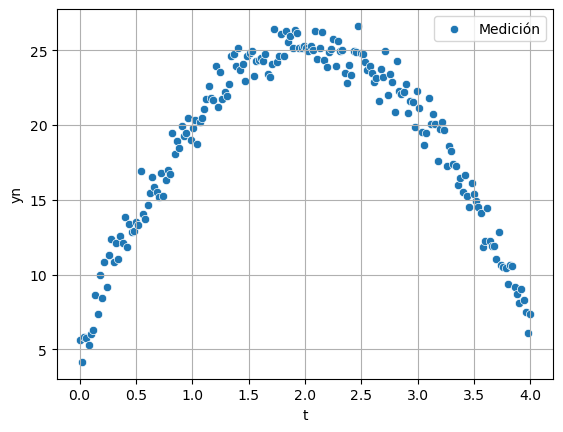

In [48]:
# GENERANDO LOS DATOS PARA PODER REALIZAR LA ESTIMACIÓN Longitud = N

N = 200
t = np.linspace(0,4,N)


#a = 4
#b = -20
#c = 3.5
#d = 4
#y_true = a*(t**3)+b*t**2+c*t+d

y0 = 5;
v0 = 20
g = 9.80665
## Valores verdaderos modelados (deberían ser medidos):
y_true = -0.5*g*(t**2)+v0*t+y0





##Señal de error de media 0:
## El valor del error puede modificarse usamdp el parámetro r, dependiendo de
## los valores máximos de la gráfica de "y" verdadero, por ejemplo:
# si el máximo de y_true es 5, r podría ser un valor cercano a 1 para 
# asumir un máximo del 20% de error.

r = 1
e = np.random.normal(0,r,size=N)

## Señal con error incluido para simular una medición
yn = y_true + e
# Creando los datos con una columna de tiempo "t", "yn", y unos (1)
data = pd.DataFrame(data = {'t':t,'yn':yn})
data['ones'] = 1
data['y_true'] = y_true
# Graficando el valor "y" contaminado con el ruido
sns.scatterplot(data,x ='t',y = 'yn')
plt.legend(["Medición"])
plt.grid()
data

## Definiendo la hipotesis - Regresor:

El regresor $\phi$ se construye según la hipótesis planteada al observar los datos. 
El procedimiento adecuado es ensayar con diferentes valores para el regresor y seleccionar el que mejor comportamiento arroje.

In [49]:
##phi = np.array([data.t, data.ones]).transpose()
phi = np.array([data.ones, np.exp(data.t), np.exp(-1*data.t)]).transpose()
#phi = np.array([data.t, data.ones]).transpose()
#phi = np.array([data.ones, data.t, data.t**2, data.t**3, data.t**4, data.t**5, data.t**6]).transpose()

## Cálculo de los parámetros:

Utilizamos el regresor y los valores medidos y aplicamos la fórmula para cálculo de los parámetros.

$$\theta = [\phi^T.\phi]^{-1}.\phi^T.y$$

In [50]:
### Calculando la matriz phi'*phi y calculando la inversa
A = np.dot(phi.transpose(),phi)
A_inv = np.linalg.inv(A)
# Calculando B = phi'*y
B = np.dot(phi.transpose(),yn)

A_inv, B

(array([[ 3.10219932e-02, -9.65781766e-04, -5.27298978e-02],
        [-9.65781766e-04,  4.35711259e-05,  1.53513811e-03],
        [-5.27298978e-02,  1.53513811e-03,  1.29883696e-01]]),
 array([ 3754.99773941, 44785.18932978,   779.24046514]))

In [46]:
#Obteniendo la matriz de parámetros theta
theta = np.dot(A_inv,B)
theta

array([-1.07431395e+02, -2.20302208e-02,  2.07235801e+02])

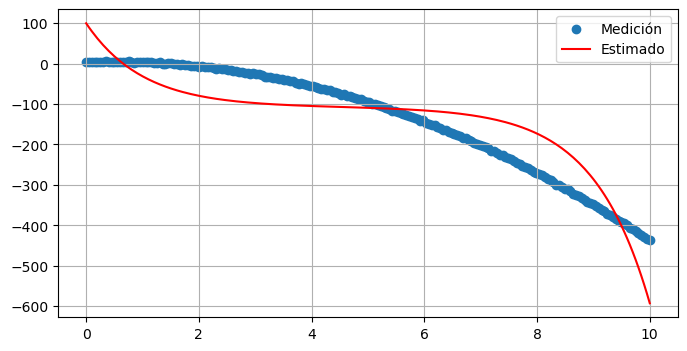

In [47]:
## Calculando los datos de salida con los parámetros estimados
#y_e = theta[0]*(t**2)+theta[1]*t+theta[2] 
y_e = np.dot(phi,theta)
#y_e = theta[0]*t+theta[1]
data_e = pd.DataFrame(data = {'t':t,'y_e':y_e})
## Graficando Los 3 modelos
#sns.scatterplot(data,x ='t',y = 'y')
#sns.scatterplot(data_e,x ='t',y = 'y_e')
plt.figure(figsize=(8,4))
plt.scatter(t,yn)
plt.plot(t,y_e,color = 'red')

plt.legend(["Medición","Estimado"])
plt.grid()

In [23]:
# Función modelo vs función original
fx,x = sym.symbols('fx,x')

# Este es el modelo estimado
fx = theta[0]+theta[1]*x+theta[2]*x**2

## Esta es la original:
f0 = -0.5*g*(x**2)+v0*x+y0
fx, f0

# Parámetros de comparación de estimación

## El error cuadrático medio (ECM)

El error cuadrático medio es dependiente de los valores de la estimación, por tanto se puede calcular utilizando los valores de las mediciones y cada una de las estimaciones realizadas, por tanto es posible calcularlo con la siguiente ecuación:

$$ECM = \frac{1}{N}\sum_{k=1}^{N}(y - \hat{y})^2$$

El ECM mide la cantidad promedio por la cual las predicciones de un modelo se desvían de los valores reales. Cuanto menor sea el ECM, mejor será el rendimiento del modelo, ya que indicará que las predicciones están más cerca de los valores reales.El ECM se usa comúnmente en problemas de regresión, pero puede aplicarse en otras áreas, como clasificación, cuando se utilizan puntuaciones de probabilidad en lugar de valores continuos.

## El coeficiente de determinación $R^2$

El $R^2$ es un indicador clave para las estimaciones o predicciones que se plantean frente a una identificación de sistemas. La idea es que este valor siempre estará en un intérvalo fijo (0 a 1), además un valor de $R^2 = 1$, significa que cada valor de la estimación es igual al valor medido, por tanto entre más se acerque el $R^2$ a un valor de 1, mejor estimación se puede tener.

$$R^2 = 1 - \frac{\frac{1}{N}\sum_{k=1}^{N}(y - \hat{y})^2}{\frac{1}{N}\sum_{k=1}^{N}y^2}$$

In [42]:
#ECM y  R2
# Señal de error ek
ek = yn - y_e
## ECM
ECM = np.dot(ek.transpose(),ek)/N
## R2
R2 = 1 - np.dot(ek.transpose(),ek)/np.dot(yn.transpose(),yn)
ECM, R2